In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
df = sns.load_dataset('tips')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2
161,12.66,2.50,Male,No,Sun,Dinner,2
132,11.17,1.50,Female,No,Thur,Lunch,2
54,25.56,4.34,Male,No,Sun,Dinner,4
118,12.43,1.80,Female,No,Thur,Lunch,2


In [19]:
df.groupby('sex')[['total_bill']].mean()

/var/folders/4j/n0rl6b3s0657t_7z21qxxz6w0000gn/T/ipykernel_73340/2388094044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [ ]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

/var/folders/4j/n0rl6b3s0657t_7z21qxxz6w0000gn/T/ipykernel_73340/884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [80]:
df.pivot_table(index ='sex',columns = 'smoker',values = 'total_bill')

/var/folders/4j/n0rl6b3s0657t_7z21qxxz6w0000gn/T/ipykernel_73340/2536270792.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index ='sex',columns = 'smoker',values = 'total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [29]:
df.pivot_table(index = 'smoker',columns = 'sex',values = 'total_bill')

/var/folders/4j/n0rl6b3s0657t_7z21qxxz6w0000gn/T/ipykernel_73340/3422479689.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'smoker',columns = 'sex',values = 'total_bill')


sex,Male,Female
smoker,,
Yes,22.284500,17.977879
No,19.791237,18.105185


In [33]:
df.pivot_table(index = 'smoker',columns = 'sex',values = 'total_bill' , aggfunc='count')

/var/folders/4j/n0rl6b3s0657t_7z21qxxz6w0000gn/T/ipykernel_73340/1632885514.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'smoker',columns = 'sex',values = 'total_bill' , aggfunc='count')


sex,Male,Female
smoker,,
Yes,60,33
No,97,54


In [31]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [77]:
df.pivot_table(index = 'sex',columns = 'smoker',values=['total_bill','tip','size'])

/var/folders/4j/n0rl6b3s0657t_7z21qxxz6w0000gn/T/ipykernel_73340/261555018.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex',columns = 'smoker',values=['total_bill','tip','size'])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [79]:
df.pivot_table(index = ['sex','day','time'],columns = 'smoker',values=['total_bill','tip','size'],margins = True)

/var/folders/4j/n0rl6b3s0657t_7z21qxxz6w0000gn/T/ipykernel_73340/2127300294.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = ['sex','day','time'],columns = 'smoker',values=['total_bill','tip','size'],margins = True)


size                           tip            \
smoker                   Yes        No       All       Yes        No   
sex    day  time                                                       
Male   Thur Lunch   2.300000  2.500000  2.433333  3.058000  2.941500   
       Fri  Lunch   1.666667       NaN  1.666667  1.900000       NaN   
            Dinner  2.400000  2.000000  2.285714  3.246000  2.500000   
       Sat  Dinner  2.629630  2.656250  2.644068  2.879259  3.256563   
       Sun  Dinner  2.600000  2.883721  2.810345  3.521333  3.115349   
Female Thur Lunch   2.428571  2.500000  2.483871  2.990000  2.437083   
            Dinner       NaN  2.000000  2.000000       NaN  3.000000   
       Fri  Lunch   2.000000  3.000000  2.250000  2.660000  3.000000   
            Dinner  2.000000  2.000000  2.000000  2.700000  3.250000   
       Sat  Dinner  2.200000  2.307692  2.250000  2.868667  2.724615   
       Sun  Dinner  2.500000  3.071429  2.944444  3.500000  3.329286   
All                 2.408602  2.668874  2.569672  3.008710  2.991854   

                             total_bill                        
smoker                   All        Yes         No        All  
sex    day  time                                               
Male   Thur Lunch   2.980333  19.171000  18.486500  18.714667  
       Fri  Lunch   1.900000  11.386667        NaN  11.386667  
            Dinner  3.032857  25.892000  17.475000  23.487143  
       Sat  Dinner  3.083898  21.837778  19.929063  20.802542  
       Sun  Dinner  3.220345  26.141333  20.403256  21.887241  
Female Thur Lunch   2.561935  19.218571  15.899167  16.648710  
            Dinner  3.000000        NaN  18.780000  18.780000  
       Fri  Lunch   2.745000  13.260000  15.980000  13.940000  
            Dinner  2.810000  12.200000  22.750000  14.310000  
       Sat  Dinner  2.801786  20.266667  19.003846  19.680357  
       Sun  Dinner  3.367222  16.540000  20.824286  19.872222  
All                 2.998279  20.756344  19.188278  19.785943

In [45]:
df = pd.read_csv("data/expense_data.csv")

In [47]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [51]:
df['Date']=pd.to_datetime(df['Date'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [55]:
df['month'] = df['Date'].dt.month_name()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
 11  month           277 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 26.1+ KB


In [71]:
df.pivot_table(index = 'month' , columns='Category',values='INR',aggfunc='sum',fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


In [65]:
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0,November
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0,November
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0,November
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0,November


<Axes: xlabel='month'>

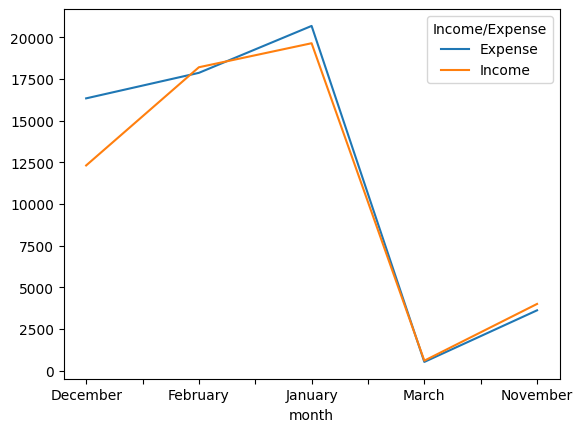

In [70]:
df.pivot_table(index = 'month' , columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()